In [5]:
import gym
from gym import wrappers
import numpy as np
import time, pickle, os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def choose_action(state):
    '''Epsilon-greedy approach for choosing action'''
    action=0
    if np.random.uniform(0, 1) < epsilon:          # Generate random number between 0 and 1
        action = env.action_space.sample()         # If less than epsilon take random action
    else:
        action = np.argmax(Q[state, :])            # Choose action with maximum value in Q-table for state
    return action

def learn(state, state2, reward, action):
    # Q-value for starting state and action taken
    current_q = Q[state, action]

    # Learned value = reward for taking action and reward for optimal action taken in end state
    target = reward + gamma * np.max(Q[state2, :])

    # Updated Q-value of the starting state
    Q[state, action] = current_q + lr_rate * (target - current_q)

def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores), np.std(scores)

def extract_policy(q_sa):
    """ Extract the policy given a q-table"""
    policy = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        policy[s] = np.argmax(q_sa[s])
    return policy

In [11]:
# Choose appropriate variables
envs = ['FrozenLake-v0', 'FrozenLake8x8-v0']
env = gym.make(envs[1])  # Initialize game

total_episodes = 15000              # Number of times game is played
max_steps = 1000                   # Max number of steps per episode
gamma = 0.99                       # Discount factor
lr_rate = 0.10                     # Learning rate, rate of adjustment of q-table for particular state action pair

epsilon = 1.0                     # Epsilon greedy approach, probability of taking random action
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00015                # Exponential decay rate for exploration

Q = np.zeros((env.observation_space.n, env.action_space.n))       # Q-table (16 x 4 matrix or 64 x 4 matrix)
q_policy_scores = []
q_policy_stds = []

In [12]:
# Start
t_start = time.time()
for episode in range(total_episodes):
    # print('-----------------')
    # print('Episode:', episode)
    # print('-----------------')
    state = env.reset()
    t = 0                             # Number of time steps

    while t < max_steps:
        # env.render()

        # Action based on epsilon-greedy approach
        action = choose_action(state)
        # new_state, reward_for_action, done=true if episode has terminated info gives debugging info
        state2, reward, done, info = env.step(action)
        # Update Q-table
        learn(state, state2, reward, action)
        state = state2
        t += 1
        if done:
            break

        time.sleep(0.1)

    # Decay epsilon after each episode to transition from exploration to exploitation
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

    if episode % 50 == 0:
        print('-----------------')
        print('Episode:', episode)
        print('-----------------')
        q_policy = extract_policy(Q)
        q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=1000)
        q_policy_scores.append(q_policy_score)
        q_policy_stds.append(q_policy_std)
        print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)
        print('Learning rate:', lr_rate)
        print('Exploration/Exploitation epsilon:', epsilon)

t_end = time.time()
print('Time lapsed:', t_end - t_start)

print('Q-table:')
print(Q)

q_policy = extract_policy(Q)
print('Q-learning policy:', q_policy)
q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=1000)
print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)

with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)


-----------------
Episode: 0
-----------------
Q-Learning policy average score =  -17.276046235375272 +/- 0.7034648541096246
Learning rate: 0.1
Exploration/Exploitation epsilon: 1.0
-----------------
Episode: 50
-----------------
Q-Learning policy average score =  -4.88616382640466 +/- 3.752103887374807
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.992602774270947
-----------------
Episode: 100
-----------------
Q-Learning policy average score =  -2.2937009151361853 +/- 1.4964999963269798
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.985260820207032
-----------------
Episode: 150
-----------------
Q-Learning policy average score =  -1.3289225595484984 +/- 0.3066822255571038
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.977973724821403
-----------------
Episode: 200
-----------------
Q-Learning policy average score =  -1.336617077614822 +/- 0.3358409913110776
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.970741078213023
-----------------
Episode: 250


-----------------
Episode: 2100
-----------------
Q-Learning policy average score =  -1.192710653153606 +/- 0.3014079542751562
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.7324909855263663
-----------------
Episode: 2150
-----------------
Q-Learning policy average score =  -1.2259824133628994 +/- 0.33154203927450787
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.7270925724888466
-----------------
Episode: 2200
-----------------
Q-Learning policy average score =  -1.2446024102843372 +/- 0.33462552651293503
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.7217344960976069
-----------------
Episode: 2250
-----------------
Q-Learning policy average score =  -1.2618863447166393 +/- 0.4951322669696773
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.7164164549594375
-----------------
Episode: 2300
-----------------
Q-Learning policy average score =  -1.2391951751212351 +/- 0.3465985778088475
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.711138149933122


-----------------
Episode: 4150
-----------------
Q-Learning policy average score =  -1.1771032233053227 +/- 0.6947587230393096
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.5412352436152631
-----------------
Episode: 4200
-----------------
Q-Learning policy average score =  -1.2196538741686787 +/- 0.5016403381815011
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.5372658829968283
-----------------
Episode: 4250
-----------------
Q-Learning policy average score =  -1.2260805743429473 +/- 0.48995380824613205
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.5333261812233374
-----------------
Episode: 4300
-----------------
Q-Learning policy average score =  -1.2052518682719149 +/- 0.5045209997920888
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.529415916685527
-----------------
Episode: 4350
-----------------
Q-Learning policy average score =  -1.2277686967059205 +/- 0.3365992322577901
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.5255348694299857


-----------------
Episode: 6200
-----------------
Q-Learning policy average score =  -0.5570796773263199 +/- 2.0984106838639507
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.4006081732678851
-----------------
Episode: 6250
-----------------
Q-Learning policy average score =  2.4546668179966242 +/- 3.888278351677765
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.39768957041003106
-----------------
Episode: 6300
-----------------
Q-Learning policy average score =  2.6279213702822517 +/- 3.844513813221509
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.39479277519273553
-----------------
Episode: 6350
-----------------
Q-Learning policy average score =  2.8030372029261823 +/- 3.797781619792272
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.3919176246705038
-----------------
Episode: 6400
-----------------
Q-Learning policy average score =  2.5931000436353635 +/- 3.867630580875706
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.38906395711536096
-----

Q-Learning policy average score =  -0.7652106551326997 +/- 4.522925958764016
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.29720749772801885
-----------------
Episode: 8300
-----------------
Q-Learning policy average score =  -16.692317132051706 +/- 2.5276165672924638
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.2950614990494626
-----------------
Episode: 8350
-----------------
Q-Learning policy average score =  -2.1397416719290776 +/- 4.47850995612207
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.2929315351553908
-----------------
Episode: 8400
-----------------
Q-Learning policy average score =  -13.473278376067665 +/- 5.465595210083522
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.29081748623477277
-----------------
Episode: 8450
-----------------
Q-Learning policy average score =  -9.909114750187939 +/- 6.013949792495066
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.28871923337179917
-----------------
Episode: 8500
-----------------
Q-L

-----------------
Episode: 10350
-----------------
Q-Learning policy average score =  3.4145564257723873 +/- 3.5204044327973314
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.21960083644856354
-----------------
Episode: 10400
-----------------
Q-Learning policy average score =  -1.014802722346862 +/- 4.581969680494706
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.21803471048875714
-----------------
Episode: 10450
-----------------
Q-Learning policy average score =  -1.4979522100151308 +/- 5.079423688180257
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.21648028653626872
-----------------
Episode: 10500
-----------------
Q-Learning policy average score =  -9.982530148536108 +/- 6.560999882907295
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.21493747715434114
-----------------
Episode: 10550
-----------------
Q-Learning policy average score =  3.372707794268693 +/- 3.629638666776656
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.21340619555953985

-----------------
Episode: 12400
-----------------
Q-Learning policy average score =  3.4068452757241467 +/- 3.6279808508044744
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.16411590406431736
-----------------
Episode: 12450
-----------------
Q-Learning policy average score =  3.336531182516054 +/- 3.6914841048525866
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.16296435847764984
-----------------
Episode: 12500
-----------------
Q-Learning policy average score =  2.017197723670044 +/- 3.4055585628064726
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.16182141717647922
-----------------
Episode: 12550
-----------------
Q-Learning policy average score =  3.1912031576692 +/- 3.7071665352662535
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.16068701587005585
-----------------
Episode: 12600
-----------------
Q-Learning policy average score =  3.3870175018860285 +/- 3.564126245555782
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.15956109074800717
-

Q-Learning policy average score =  3.368466466006097 +/- 3.540867358020484
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.123318783875133
-----------------
Episode: 14500
-----------------
Q-Learning policy average score =  3.010845199754699 +/- 3.716820388648337
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.12247207213405613
-----------------
Episode: 14550
-----------------
Q-Learning policy average score =  -0.7310700690740846 +/- 4.1873228745251385
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.12163168697669256
-----------------
Episode: 14600
-----------------
Q-Learning policy average score =  3.419683595628712 +/- 3.511772999179157
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.12079758113115559
-----------------
Episode: 14650
-----------------
Q-Learning policy average score =  3.509144000024299 +/- 3.5010671074897672
Learning rate: 0.1
Exploration/Exploitation epsilon: 0.11996970767877155
-----------------
Episode: 14700
-----------------
Q-L

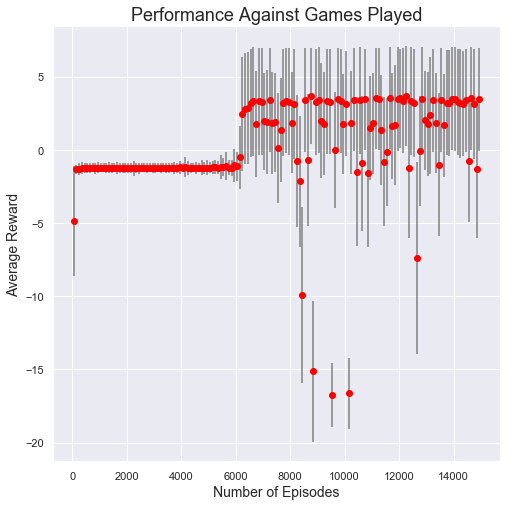

In [13]:
num_episodes = []
epsilons = []
lr_rates = []
for i in range(0, 5000, 50):
    if i == 0:
        num_episodes.append(1)
        epsilons.append(1.0)
        lr_rates.append(0.1)
    elif i % 50 == 0:
        num_episodes.append(i)
        epsilons.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * i))
        lr_rates.append(0.1)

# lr<learning rate>_e<epsilon_decay_constant>
file_name = 'lr10_e00015'   
        
# Plot average reward over time
sns.set()
plt.figure(figsize=(8,8))
plt.errorbar(num_episodes[1::2], q_policy_scores[1::2], q_policy_stds[1::2],
             fmt='o', color='red', ecolor='gray')
plt.title('Performance Against Games Played', fontsize=18)
plt.xlabel('Number of Episodes', fontsize=14)
plt.ylabel('Average Reward', fontsize=14)

plt.savefig('plots/' + file_name + '.png')
plt.show()

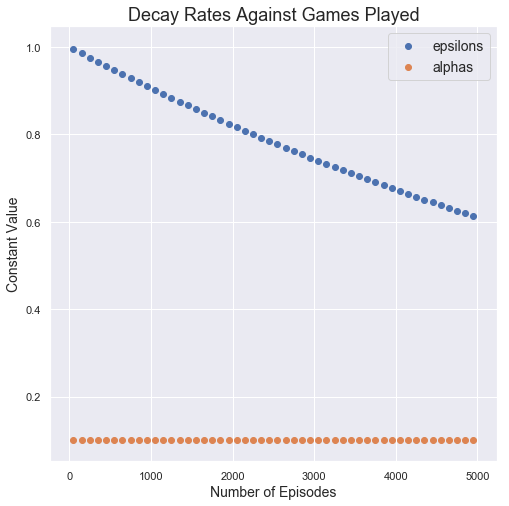

In [9]:
file_name = 'epsilon_decay'

# Plot learning rate decay and epsilon decay
plt.figure(figsize=(8,8))
plt.scatter(num_episodes[1::2], epsilons[1::2], label='epsilons')
plt.scatter(num_episodes[1::2], lr_rates[1::2], label='alphas')
plt.legend(fontsize=14)
plt.title('Decay Rates Against Games Played', fontsize=18)
plt.xlabel('Number of Episodes', fontsize=14)
plt.ylabel('Constant Value', fontsize=14)

plt.savefig('plots/' + file_name + '.png')
plt.show()

In [10]:
q_policy_score, q_policy_std = evaluate_policy(env, q_policy, gamma, n=100000)
print('Q-Learning policy average score = ', q_policy_score, '+/-', q_policy_std)

Q-Learning policy average score =  3.3076125605555826 +/- 3.5629309609240356
